In [1]:
import time
from tqdm import tqdm
import wave, sys

import contextlib
from pydub import AudioSegment
import os
import scipy.io.wavfile as wav
import speechpy
import numpy as np

import soundfile as sf
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from datetime import datetime

import glob
import librosa

from IPython.display import Audio, display
%matplotlib inline


import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from python_speech_features import mfcc, logfbank
import librosa
import glob
from scipy import fftpack

import noisereduce as nr
from scipy.signal import butter, lfilter, freqz

/home/neko/miniconda3/envs/pyaudio/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/home/neko/miniconda3/envs/pyaudio/lib/python3.8/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))
def plot(x, title):
    plt.figure(1)
    plt.title(title)
    plt.plot(x)
    plt.show()
    
def fft(x):
    time_step = 0.02
    period = 5.
    time_vec = np.arange(0, 20, time_step)
    sig_fft = fftpack.fft(x)
    power = np.abs(sig_fft)
    sample_freq = fftpack.fftfreq(x.size, d=time_step)
    
    
#     f, ax = plt.subplots(1)
#     ax.title(title)
#     ax.plot(sample_freq, power)
#     ax.set_xlim(xmin=0)
#     plt.show(f)
      
#     plt.figure(figsize=(6, 5))
#     plt.plot(sample_freq, power)
#     plt.xlabel('Frequency [Hz]')
#     plt.ylabel('Power')
#     plt.title(title)

    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    peak_freq = freqs[power[pos_mask].argmax()]

    np.allclose(peak_freq, 1./period)
    # fft_power.append(power.max())

#     print('Audio Name: ', title, 'Power : ', power.max())

#     axes = plt.axes([0.55, 0.3, 0.3, 0.5])
#     plt.title('Peak frequency')
#     plt.plot(freqs[:8], power[:8])
#     plt.setp(axes, yticks=[])
#     plt.savefig('/home/neko/Desktop/MAS-testing 27 Aug/test14sept/{}.png'.format(file))
    scipy.signal.find_peaks_cwt    
    return sample_freq, power
    
    
def spike_detection(signal,fs,figures):
    ## Find the window size
    # (500 ms)
    windowsize = round(fs/4)
#     print('WSize:',windowsize)
    ## Samples before spike 
    buffer_before_spike = 100
    
    ## Get MAA of signal
    MAA = np.mean(abs(signal))
    print('MAA:',MAA)
    
    ## indices of points larger than 5*MAA
    spike_points_positions = np.argwhere(abs(signal)>50*MAA).transpose()[0] 
    ## Find the spike points
    first_spike_position = spike_points_positions[0] 
    following_spike_positions = spike_points_positions[1::][np.diff(spike_points_positions,1)>windowsize]
    
    spike_positions = np.insert(following_spike_positions,0,first_spike_position,axis=0)

    ## For each spike positions find the spike start
    # Get zero crossings of signal
    zero_crossings = np.where(np.diff(np.sign(signal.ravel())))[0]
    
    #First file finish at 35
#     i=36
    
    for spike_idx in spike_positions: 
        spike_start = find_nearest(zero_crossings[0:spike_idx].transpose(),spike_idx) 
        frame = signal[spike_start-buffer_before_spike:spike_start-buffer_before_spike+windowsize]
        
        plt.figure()
        plt.plot(signal)
        plt.vlines([spike_start],ymin=-2,ymax=2,color='r')
        plt.figure()
        plt.plot(frame)
        scipy.io.wavfile.write('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/S_Good/trimmed_{}.wav'.format(i), rate, frame)
#         i+=1       
def find_nearest(array, value):
    array = np.asarray(array)
    diff_array = value - array
    ## Keep Positive values
    diff_array = diff_array[diff_array >= 0]
    idx = np.argmin(diff_array)
    return array[idx]
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    print('low: ', low, 'high :', high)
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
# # S Good
path = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/S_Good/"
# # S Bad
# pathSB = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/S_Bad/"
# M Good
# path = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/M_Good/"
# # M Bad
# path1 = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/M_Bad/"
# # L Good
# path = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/L_Good/"
# # L Bad
# path = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/L_Bad/"
# # XL Good
# path = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/XL_Good/"
# # XL Bad
# path = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/XL_Bad/"



In [ ]:
# path = "/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/Plot"

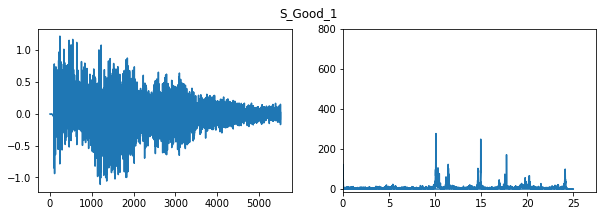

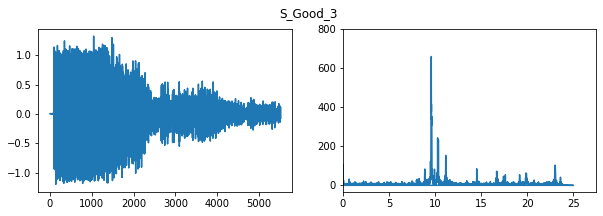

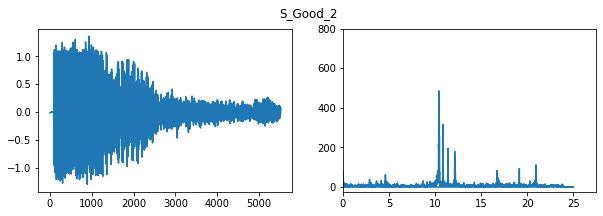

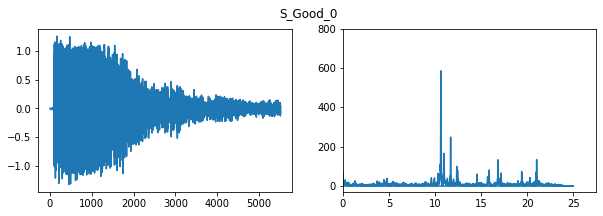

In [14]:
for file in glob.glob('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/S_Good/*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    sample_freq, power = fft(signal)
    
    plt.figure(figsize = (10,3))
    plt.suptitle(filename)
    
    ax1 = plt.subplot(121)
    ax1.plot(signal)
#     ax1.title.set_text(filename, ' Time Domain')
    
    ax2 = plt.subplot(122)
    ax2.plot(sample_freq, power)
    ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymax=800)
#     ax2.title.set_text(filename, ' Frequency Domain')  
    
    plt.show()


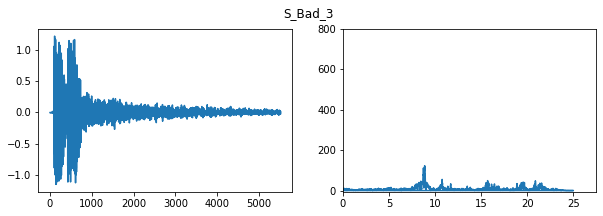

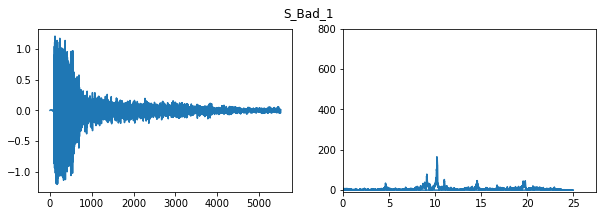

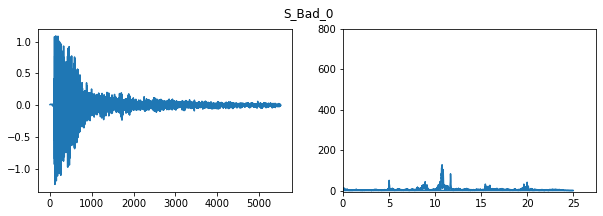

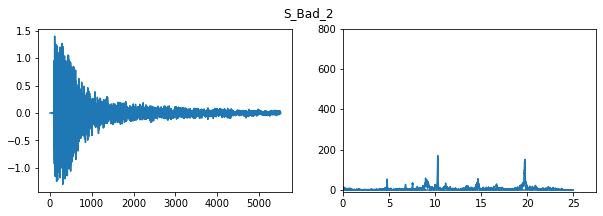

In [15]:
for file in glob.glob('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/S_Bad/*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    sample_freq, power = fft(signal)
    
    plt.figure(figsize = (10,3))
    plt.suptitle(filename)
    
    ax1 = plt.subplot(121)
    ax1.plot(signal)
#     ax1.title.set_text(filename, ' Time Domain')
    
    ax2 = plt.subplot(122)
    ax2.plot(sample_freq, power)
    ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymax=800)
#     ax2.title.set_text(filename, ' Frequency Domain')  
    
    plt.show()


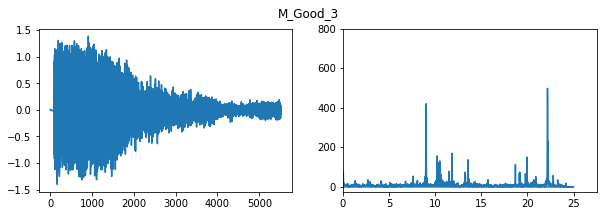

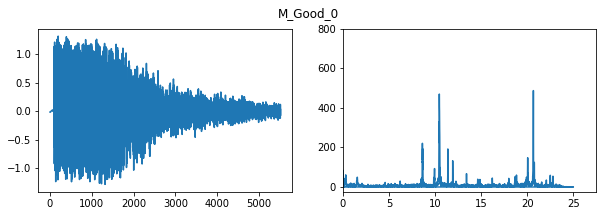

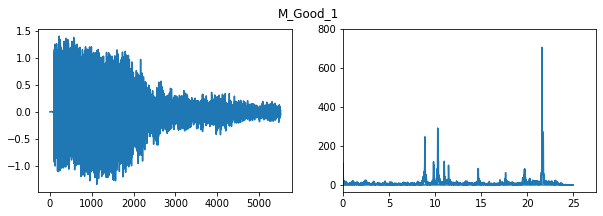

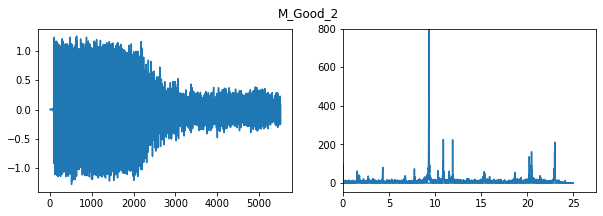

In [16]:
for file in glob.glob('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/M_Good/*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    sample_freq, power = fft(signal)
    
    plt.figure(figsize = (10,3))
    plt.suptitle(filename)
    
    ax1 = plt.subplot(121)
    ax1.plot(signal)
#     ax1.title.set_text(filename, ' Time Domain')
    
    ax2 = plt.subplot(122)
    ax2.plot(sample_freq, power)
    ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymax=800)
#     ax2.title.set_text(filename, ' Frequency Domain')  
    
    plt.show()


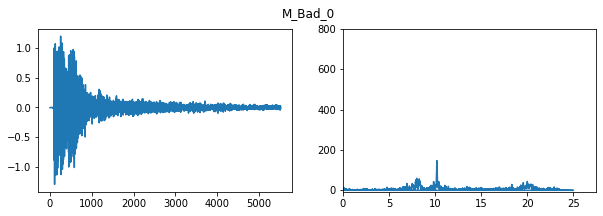

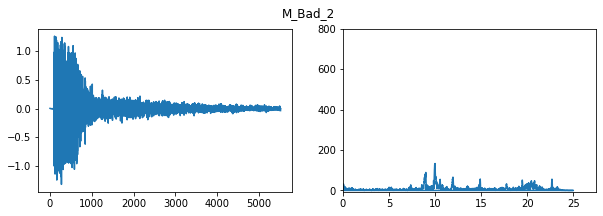

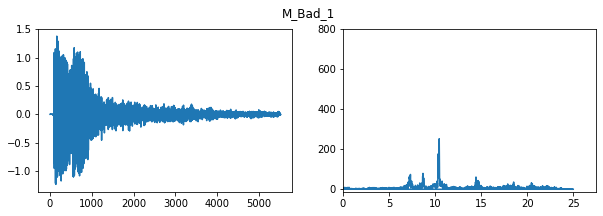

In [17]:
for file in glob.glob('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/M_Bad/*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    sample_freq, power = fft(signal)
    
    plt.figure(figsize = (10,3))
    plt.suptitle(filename)
    
    ax1 = plt.subplot(121)
    ax1.plot(signal)
#     ax1.title.set_text(filename, ' Time Domain')
    
    ax2 = plt.subplot(122)
    ax2.plot(sample_freq, power)
    ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymax=800)
#     ax2.title.set_text(filename, ' Frequency Domain')  
    
    plt.show()


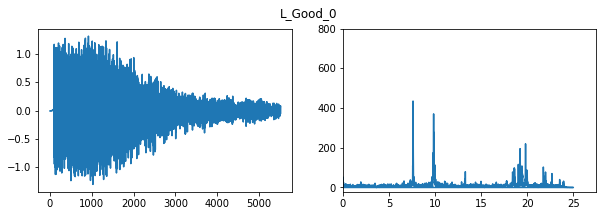

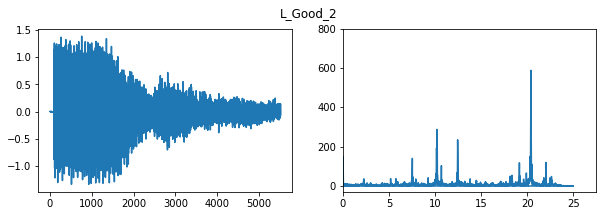

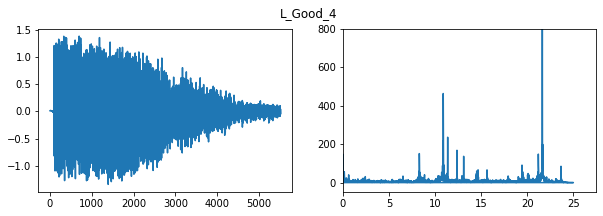

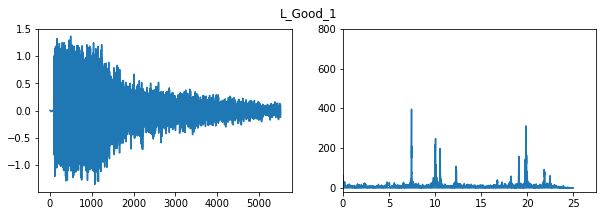

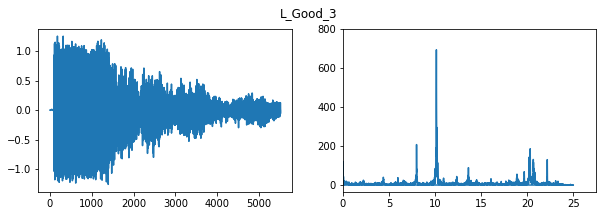

In [18]:
for file in glob.glob('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/L_Good/*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    sample_freq, power = fft(signal)
    
    plt.figure(figsize = (10,3))
    plt.suptitle(filename)
    
    ax1 = plt.subplot(121)
    ax1.plot(signal)
#     ax1.title.set_text(filename, ' Time Domain')
    
    ax2 = plt.subplot(122)
    ax2.plot(sample_freq, power)
    ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymax=800)
#     ax2.title.set_text(filename, ' Frequency Domain')  
    
    plt.show()


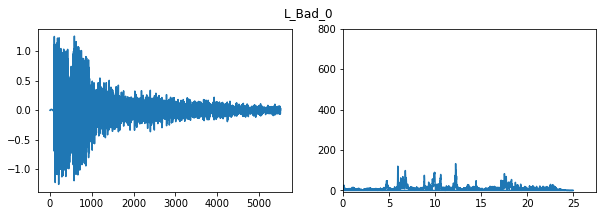

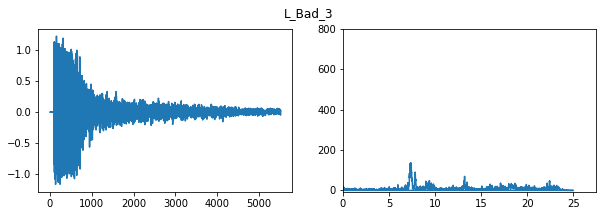

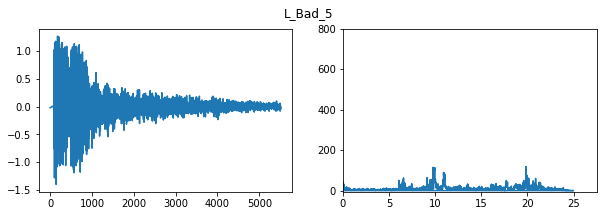

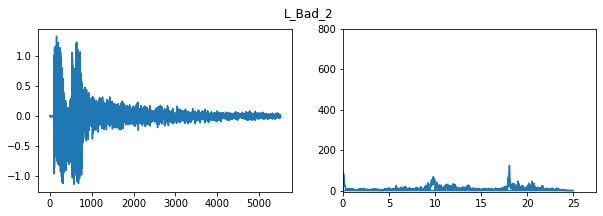

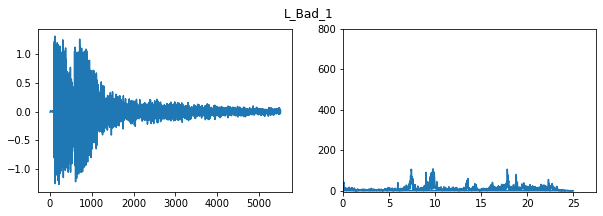

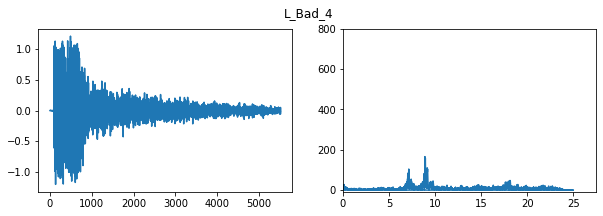

In [19]:
for file in glob.glob('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/L_Bad/*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    sample_freq, power = fft(signal)
    
    plt.figure(figsize = (10,3))
    plt.suptitle(filename)
    
    ax1 = plt.subplot(121)
    ax1.plot(signal)
    ax1.title.set_text(filename, ' Time Domain')
    
    ax2 = plt.subplot(122)
    ax2.plot(sample_freq, power)
    ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymax=800)

    ax2.title.set_text(filename, ' Frequency Domain')  
    
    plt.show()


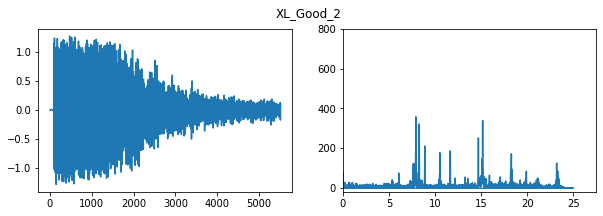

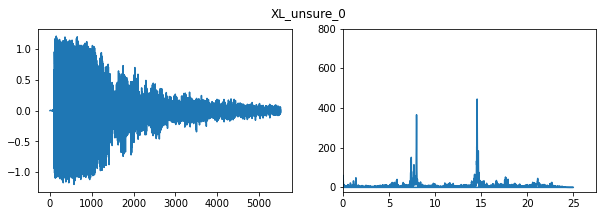

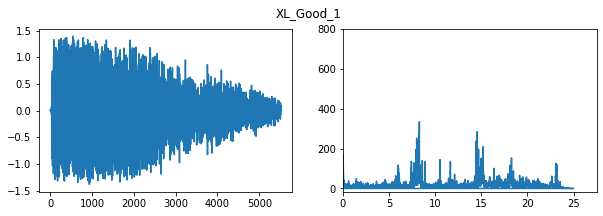

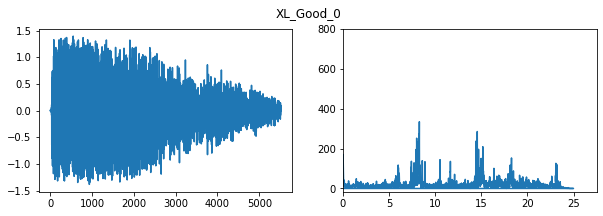

In [20]:
for file in glob.glob('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/XL_Good/*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    sample_freq, power = fft(signal)
    
    plt.figure(figsize = (10,3))
    plt.suptitle(filename)
    
    ax1 = plt.subplot(121)
    ax1.plot(signal)
#     ax1.title.set_text(filename, ' Time Domain')
    
    ax2 = plt.subplot(122)
    ax2.plot(sample_freq, power)
    ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymax=800)
#     ax2.title.set_text(filename, ' Frequency Domain')  
    
    plt.show()


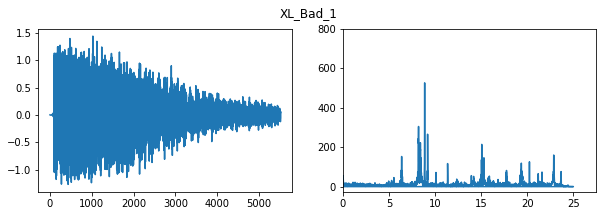

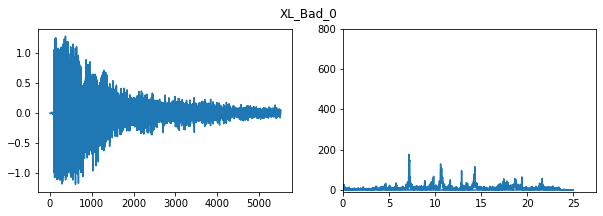

In [21]:
for file in glob.glob('/home/neko/Desktop/MAS-testing 27 Aug/data_23sept20/XL_Bad/*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    sample_freq, power = fft(signal)
    
    plt.figure(figsize = (10,3))
    plt.suptitle(filename)
    
    ax1 = plt.subplot(121)
    ax1.plot(signal)
#     ax1.title.set_text(filename, ' Time Domain')
    
    ax2 = plt.subplot(122)
    ax2.plot(sample_freq, power)
    ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymax=800)
#     ax2.title.set_text(filename, ' Frequency Domain')  
    
    plt.show()


In [ ]:
#Bandpass Filter

for file in glob.glob(path+'*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
#     y = butter_bandpass_filter(signal, 3000, 7000, rate, order=4)
    
    plot_fft(signal, filename)
    plot(signal, filename)
    play(signal, rate)
    
#     plot_fft(y, filename)
#     plot(y, 'bandpassed '+filename)
#     play(y, rate)
    
    plt.savefig(path+'{}.png'.format(filename))
    
    
for file in glob.glob(path1+'*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)
    
#     y = butter_bandpass_filter(signal, 3000, 7000, rate, order=4)
    
    plot_fft(signal, filename)
    plot(signal, filename)
    play(signal, rate)
    
    
#     plot_fft(y, filename)
#     plot(y, 'bandpassed '+filename)
#     play(y, rate)

In [ ]:
#Highpass Filter
for file in glob.glob(path+'*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)   
    
    y = butter_highpass_filter(signal, 6000, rate, order=4)
    
    plot_fft(signal, filename)
    plot(signal, filename)
    play(signal, rate)
    
    plot_fft(y, filename)
    plot(y, 'bandpassed '+filename)
    play(y, rate)
    
#     plt.savefig(path+'{}.png'.format(filename))
    
    
for file in glob.glob(path1+'*.wav'):
    filename = file.split('/')[-1]
    filename = filename.replace(".wav","")
    signal, rate = librosa.load(file)
    
    y = butter_highpass_filter(signal, 6000, rate, order=4)
    
    plot_fft(signal, filename)
    plot(signal, filename)
    play(signal, rate)
    
    plot_fft(y, filename)
    plot(y, 'bandpassed '+filename)
    play(y, rate)

In [ ]:
#Highpass Filter



y = butter_highpass_filter(signal, 7, rate, order=4)
plot(y, 'Good Former Highpass Signal Time Domain')
plot_fft(y, 'Good Former Highpass Signal Frequency Domain')
play(y, rate)

In [ ]:
# Trimming
for file in glob.glob(path+'*.wav'):
    filename = file.split('/')[-1]
    print(filename)
    signal, rate = librosa.load(file)
    windowsize = round(rate/4)
    buffer_before_spike = 100
    MAA = np.mean(abs(signal))
    print('MAA:',MAA)
    spike_points_positions = np.argwhere(abs(signal)>50*MAA).transpose()[0] 
    first_spike_position = spike_points_positions[0] 
    following_spike_positions = spike_points_positions[1::][np.diff(spike_points_positions,1)>windowsize]
    
    spike_positions = np.insert(following_spike_positions,0,first_spike_position,axis=0)

    ## For each spike positions find the spike start
    # Get zero crossings of signal
    zero_crossings = np.where(np.diff(np.sign(signal.ravel())))[0]
    
    #First file finish at 35
#     i=36
    
    for spike_idx in spike_positions: 
        spike_start = find_nearest(zero_crossings[0:spike_idx].transpose(),spike_idx) 
        frame = signal[spike_start-buffer_before_spike:spike_start-buffer_before_spike+windowsize]
        
        plt.figure()
        plt.plot(signal)
        plt.vlines([spike_start],ymin=-2,ymax=2,color='r')
        plt.figure()
        plt.plot(frame)
        scipy.io.wavfile.write(path+'{}'.format(filename), rate, frame)